## <font color='black'> <p align = "center">Identificação antecipada de alunos com tendência à reprovação</p></font>   

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


##### Carregando os Pacotes utilizados neste Notebook

In [2]:
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

Versões dos pacotes usados neste jupyter notebook

In [3]:
%reload_ext watermark
%watermark -a "João Paulo Andrade" --iversions

Author: João Paulo Andrade

joblib    : 1.1.0
numpy     : 1.21.5
pandas    : 1.4.2
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.5.1
seaborn   : 0.11.2
sklearn   : 1.1.1



### Carregando o Conjunto de dados

In [3]:
# Carrega os dados com o ano letivo do ano anterior para treinamento e teste
dados = pd.read_csv('dados/dados_2018_am.csv')

In [5]:
# Verificando o Shape da base de dados
dados.shape

(8582, 21)

In [6]:
# Colunas do dataset
dados.columns

Index(['Unnamed: 0', 'escola', 'serie', 'turno', 'idade', 'munic',
       'proc_escola', 'proc_rendimento', 'biologia', 'ed_fisica', 'filosofia',
       'fisica', 'geografia', 'historia', 'lingua_estrangeira',
       'lingua_portuguesa', 'matematica', 'quimica', 'sociologia',
       'qtd_faltas', 'parecer_conclusivo'],
      dtype='object')

In [7]:
# Excluindo as colunas desnecessárias
dados = dados.drop(['Unnamed: 0','qtd_faltas'], axis=1)

In [8]:
# Amostra dos dados
dados.sample(5)

,escola,serie,turno,idade,munic,proc_escola,proc_rendimento,biologia,ed_fisica,filosofia,fisica,geografia,historia,lingua_estrangeira,lingua_portuguesa,matematica,quimica,sociologia,parecer_conclusivo
3689,171,2,2,1,2,2,2,1.189864,-0.984423,-0.047549,-0.149624,1.833400,-0.103412,0.350497,0.434920,0.334118,0.788092,0.531786,1
6203,182,2,1,1,2,1,2,1.189864,0.779416,0.684631,-0.149624,1.031213,0.445603,-0.157992,0.434920,0.334118,1.855937,0.531786,1
5759,179,3,1,1,2,2,4,-0.976095,-0.102504,-1.511910,0.363432,-1.642746,0.171096,-1.174970,-1.666129,-0.403395,-0.279752,-1.398220,1
8105,189,3,2,1,2,1,3,0.377629,-0.102504,-0.047549,-0.149624,1.031213,0.720111,1.621720,-0.165380,0.334118,0.788092,-0.433217,1
3875,173,2,2,1,2,3,3,-0.976095,-0.984423,-0.047549,-0.406152,-0.840558,0.171096,0.604742,1.335370,-1.140907,-0.279752,-3.328225,1



### <font color='black'> <p align = "center">Etapas</p></font>    
1. Análise exploratória dos dados

2. Exploração das Variáveis Numéricas
	1. Visualização de correlação entre as variáveis disciplinas
	2. Visualização das variáveis com o auxílio dos histogramas

3. Verificação de Valores Ausentes e Registros Duplicados

In [9]:
# Tipos de dados das variáveis
dados.dtypes

escola                  int64
serie                   int64
turno                   int64
idade                   int64
munic                   int64
proc_escola             int64
proc_rendimento         int64
biologia              float64
ed_fisica             float64
filosofia             float64
fisica                float64
geografia             float64
historia              float64
lingua_estrangeira    float64
lingua_portuguesa     float64
matematica            float64
quimica               float64
sociologia            float64
parecer_conclusivo      int64
dtype: object

### Análise Exploratória de Dados

### Exploração das Variáveis Numéricas

Visualizando a correlação entre as disciplinas

<AxesSubplot:>

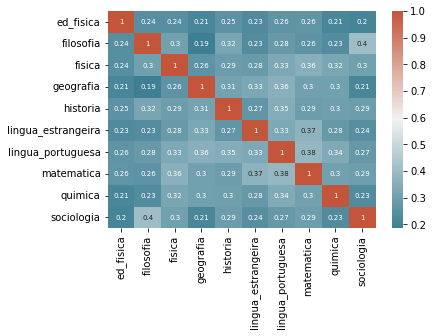

In [10]:
correlations = dados.iloc[:,8:18].corr()
sns.heatmap(correlations, annot=True,
annot_kws={"fontsize": 7}, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Visualização das variáveis com o auxílio dos histogramas

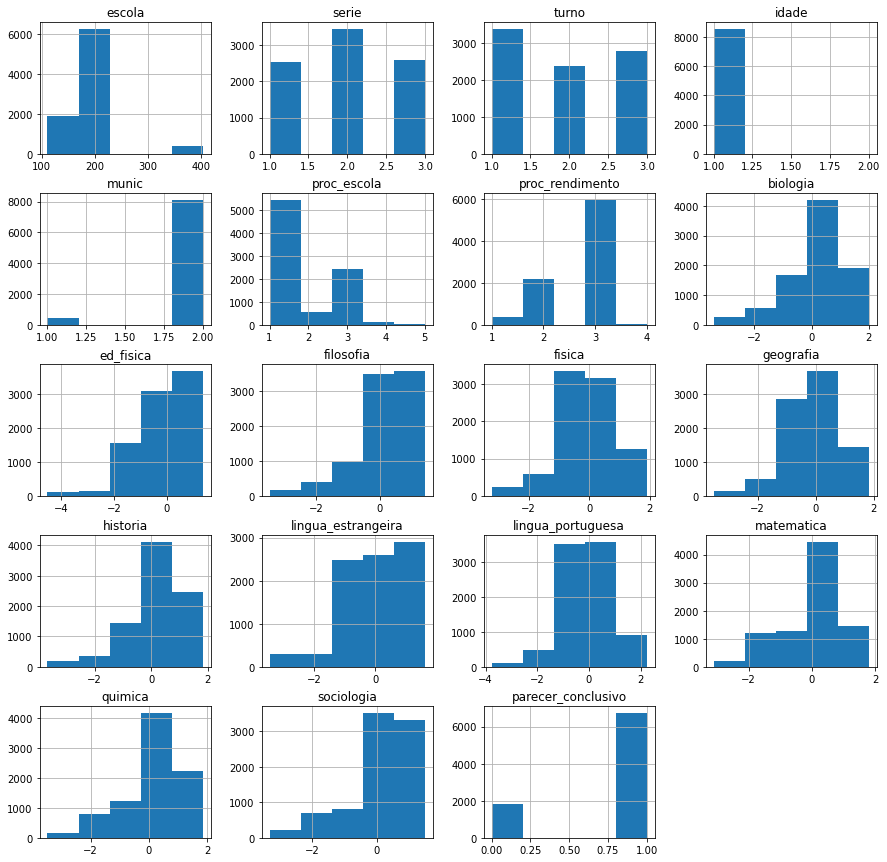

In [11]:
# Plot 
dados.hist(figsize = (15,15), bins = 5) 
plt.show()

### Verificando Valores Ausentes e Registros Duplicados

In [12]:
# Verificando valores ausentes, já foram tratados no R.
dados[dados.isnull().values]

,escola,serie,turno,idade,munic,proc_escola,proc_rendimento,biologia,ed_fisica,filosofia,fisica,geografia,historia,lingua_estrangeira,lingua_portuguesa,matematica,quimica,sociologia,parecer_conclusivo


In [13]:
# Deletando valores ausentes
dados = dados.dropna()

In [14]:
# Verificando registros duplicados

dados[dados.duplicated(keep = False)].shape

(30, 19)

## Limpeza de Dados

### Tratamento de Registros Duplicados

In [15]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(8563, 19)


### Tratamento de Valores Ausentes

In [16]:
# Verifica se há valor ausente
dados.isnull().values.any()

False

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning


### <font color='black'> <p align = "center">Pré-Processamento</p></font>    

1. Limpeza dos Dados
	1. Tratamento de Registros Duplicados	
	1. Tratamento de Valores Ausentes
	

2. Pré-Processamento de Dados Para Construção de Modelos de Machine Learning
	1. Divisão em Treino e Teste

### Divisão em Treino e Teste

In [17]:
dados.head()

,escola,serie,turno,idade,munic,proc_escola,proc_rendimento,biologia,ed_fisica,filosofia,fisica,geografia,historia,lingua_estrangeira,lingua_portuguesa,matematica,quimica,sociologia,parecer_conclusivo
0,111,1,1,1,2,1,3,0.919119,-0.102504,0.440571,0.106904,-0.840558,1.269127,1.113231,0.13477,0.825793,1.322015,0.290535,1
1,111,1,2,1,2,1,3,0.919119,-0.102504,0.440571,0.106904,-0.840558,1.269127,1.113231,0.13477,0.825793,1.322015,0.290535,1
2,111,1,1,1,2,1,3,0.648374,1.073389,1.416812,0.876487,1.298609,-0.926935,1.113231,-0.46553,-0.157557,0.521131,-1.156969,1
3,111,1,1,1,2,1,3,0.648374,0.191470,0.440571,-0.919208,-0.305767,-1.750459,-1.429215,-0.16538,-0.157557,1.588976,-1.639470,1
4,111,1,3,1,2,1,3,0.648374,0.191470,0.440571,-0.919208,-0.305767,-1.750459,-1.429215,-0.16538,-0.157557,1.588976,-1.639470,1


In [18]:
# Cria um objeto separado para a variável target
y = dados.parecer_conclusivo

In [19]:
# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('parecer_conclusivo', axis = 1)

In [20]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 1234,
                                                        stratify = dados.parecer_conclusivo)

In [21]:
# Distribuição dos dados de treino e teste
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(6850, 18) (1713, 18) (6850,) (1713,)


In [22]:
# Visualizando o dataset de treino
X_treino.head(2)

,escola,serie,turno,idade,munic,proc_escola,proc_rendimento,biologia,ed_fisica,filosofia,fisica,geografia,historia,lingua_estrangeira,lingua_portuguesa,matematica,quimica,sociologia
5363,178,3,1,1,2,1,3,0.106885,-0.396477,0.196511,-0.149624,0.229025,-0.377920,0.096253,0.434920,-0.157557,0.254170,1.014287
6169,182,2,1,1,2,1,2,1.460608,0.191470,1.416812,0.876487,1.031213,1.818142,0.350497,1.935669,1.317468,1.855937,1.014287


### Balanceamento de Classe

Como podemos perceber, a variável parecer_conclusivo, que é nossa variável dependente, está bastante desbalanceada. Para balancear os dados, vamos utilizar a função under_sampling.

<AxesSubplot:>

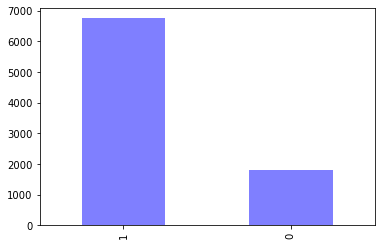

In [23]:
# Verifica a distribuição da nossa variável target
dados['parecer_conclusivo'].value_counts().plot(kind='bar', color='blue', alpha=0.5)

In [24]:
# Distribuição da variável parecer conclusivo antes do balanceamento
y_treino.value_counts()

1    5403
0    1447
Name: parecer_conclusivo, dtype: int64

Vamos aplicar a técnica de undersampling e reduzir o número de exemplos da classe majoritária (1/"Aprovado")

In [25]:
# Carrega a função under sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Definindo a função como variável
undersample = RandomUnderSampler(sampling_strategy='majority')

In [27]:
# Aplica o undersample aos dados de treino
X_res, y_res = undersample.fit_resample(X_treino, y_treino)
# Visualizando a distribuição da classe após o balanceamento
print(Counter(y_res))

Counter({0: 1447, 1: 1447})


Vamos confirmar que nossos dados de treino estão balanceados.

In [28]:
# Qtd de registros
print(len(X_res), len(y_res))

2894 2894


In [29]:
# Distribuição
y_res.value_counts()

0    1447
1    1447
Name: parecer_conclusivo, dtype: int64

Tudo certo, classe balanceada, podemos prosseguir!
Vamos renomear as variáveis de treino para ajustar aos dados de treino.

In [30]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res

In [31]:
# Ajusta o nome do dataset de treino para y
y_treino = y_res

Visualizando o dataset de treino

In [32]:
X_teste.head(2)

,escola,serie,turno,idade,munic,proc_escola,proc_rendimento,biologia,ed_fisica,filosofia,fisica,geografia,historia,lingua_estrangeira,lingua_portuguesa,matematica,quimica,sociologia
6272,182,2,1,1,2,1,2,0.648374,-0.984423,-0.047549,-0.149624,1.833400,-0.103412,0.096253,0.434920,0.08828,1.322015,0.531786
1684,148,2,2,1,2,3,2,-0.163860,0.485443,0.440571,-1.432264,-0.305767,0.720111,-0.157992,-1.365979,0.08828,-0.279752,0.531786


## Construção, Treinamento e Avaliação dos Modelos (Regressão Logística, Random Forest, XGBoost e KNN)

### Regressão Logística (Benchmark)
https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica

In [33]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1','l2']}

In [34]:
# Criaremos o modelo com GridSearch 
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [35]:
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [36]:
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

In [37]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [38]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [39]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [40]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([[0.08199742, 0.91800258],
       [0.68714529, 0.31285471],
       [0.34299948, 0.65700052],
       [0.14302442, 0.85697558],
       [0.42825521, 0.57174479],
       [0.6028226 , 0.3971774 ],
       [0.41653396, 0.58346604],
       [0.78195705, 0.21804295],
       [0.37511603, 0.62488397],
       [0.10051965, 0.89948035]])

In [41]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [42]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

array([0.91800258, 0.31285471, 0.65700052, 0.85697558, 0.57174479,
       0.3971774 , 0.58346604, 0.21804295, 0.62488397, 0.89948035])

In [43]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[ 293,   69],
       [ 300, 1051]], dtype=int64)

In [44]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [45]:
print(tn, fp, fn, tp)

293 69 300 1051


In [46]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.7936672650911336


In [47]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [48]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.8823584739767147


In [49]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.7845884413309983


#### Feature Importance

In [50]:
# Construindo o modelo novamente com os melhores hiperparâmetros
modelo_v1 = LogisticRegression(C = 1)
modelo_v1.fit(X_treino, y_treino)

LogisticRegression(C=1)

In [51]:
# Obtemos os coeficientes usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))

In [52]:
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
serie
munic
matematica
proc_escola
geografia
proc_rendimento
idade
lingua_portuguesa
biologia
lingua_estrangeira
historia
quimica
fisica
sociologia
filosofia
ed_fisica
escola
turno


In [53]:
# Salva o modelo em disco
with open('models/modelo_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'models/modelo_v1.pkl') 

In [54]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

In [55]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

In [56]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

In [57]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.793667,0.882358,0.784588


### Random Forest
https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/

In [58]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [59]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [60]:
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [61]:
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=400)

In [62]:
# Previsões em teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [63]:
# Obtém as previsões para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]

In [64]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_teste, y_pred_v2)

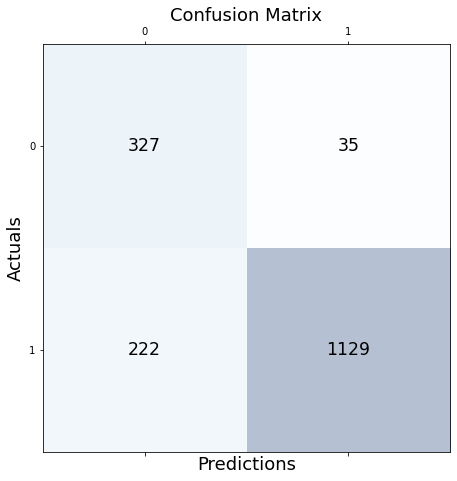

In [65]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [66]:
# Curva ROC nos dados e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
print(roc_auc_v2)

0.8694960966094278


In [67]:
# Curva ROC nos dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)

In [68]:
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.9376254953359697


In [69]:
# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(acuracia_v2)

0.8499708114419148


#### Feature Importance

In [70]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
modelo_v2.fit(X_treino, y_treino)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [71]:
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
serie
matematica
biologia
geografia
lingua_portuguesa
filosofia
lingua_estrangeira
historia
escola
fisica
quimica
sociologia
ed_fisica
proc_escola
turno
proc_rendimento
munic
idade


In [72]:
# Salva o modelo em disco
with open('models/modelo_v2.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v2, 'models/modelo_v2.pkl') 

In [73]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}

In [74]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

In [75]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.793667,0.882358,0.784588
1,modelo_v2,Random Forest,0.869496,0.937625,0.849971


### Key Nearest Neighbors - KNN
https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/

In [76]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

In [77]:
# Lista para os scores
cv_scores = []

In [78]:
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [79]:
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

In [80]:
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 17


In [81]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [82]:
# Treinamento
modelo_v3.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=17)

In [83]:
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)

In [84]:
# Confusion Matrix
confusion_matrix(y_teste, y_pred_v3)

array([[ 298,   64],
       [ 202, 1149]], dtype=int64)

In [85]:
# Previsão de probabilidade da classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]

In [86]:
# Calcula ROC_AUC em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred_v3)
print(roc_auc_v3)

0.8368427724910135


In [87]:
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)

In [88]:
# Calcula AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.9064658468660416


In [89]:
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
print(acuracia_v3)

0.8447168709865732


Obs: Com o algoritmo KNN não extraímos as variáveis mais importantes, pois o conceito do algoritmo é diferente.

In [90]:
# Salva o modelo em disco
with open('models/modelo_v3.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v3, 'models/modelo_v3.pkl') 

In [91]:
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}

In [92]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

In [93]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.793667,0.882358,0.784588
1,modelo_v2,Random Forest,0.869496,0.937625,0.849971
2,modelo_v3,KNN,0.836843,0.906466,0.844717


### Decision Tree (Árvore de Decisão)
https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/

In [94]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [95]:
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [96]:
# Treinamento
modelo_v4.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [97]:
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=7)

In [98]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)

In [99]:
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]

In [100]:
# Confusion matrix
confusion_matrix(y_teste, y_pred_v4)

array([[ 295,   67],
       [ 235, 1116]], dtype=int64)

In [101]:
# Calcula ROC AUC score
roc_auc_v4 = roc_auc_score(y_teste, y_pred_v4)
print(roc_auc_v4)

0.8204859506565629


In [102]:
# Curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)

In [103]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.8888678736029378


In [104]:
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
print(acuracia_v4)

0.8237011091652072


#### Feature Importance

In [105]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
modelo_v4.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [106]:
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
serie
matematica
geografia
lingua_estrangeira
escola
filosofia
fisica
biologia
lingua_portuguesa
historia
ed_fisica
proc_rendimento
proc_escola
munic
idade
turno
quimica
sociologia


In [107]:
# Salva o modelo em disco
with open('models/modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'models/modelo_v4.pkl') 

In [108]:
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}

In [109]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

In [110]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.793667,0.882358,0.784588
1,modelo_v2,Random Forest,0.869496,0.937625,0.849971
2,modelo_v3,KNN,0.836843,0.906466,0.844717
3,modelo_v4,Decision Tree,0.820486,0.888868,0.823701


### Gradient Boosting - XGBoost
https://www.datageeks.com.br/xgboost/

In [111]:
import xgboost as xgb
# fit model no training data
modelo_v5 = xgb.XGBClassifier(n_estimators=1000, learning_rate=1.0,)
modelo_v5.fit(X_treino, y_treino)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [112]:
# make predictions for test data
y_pred_v5 = modelo_v5.predict(X_teste)
predictions = [round(value) for value in y_pred_v5]

In [113]:
# evaluate predictions
accuracy = accuracy_score(y_teste, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [114]:
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)

In [115]:
confusion_matrix(y_teste, y_pred_v5)

array([[ 314,   48],
       [ 214, 1137]], dtype=int64)

In [116]:
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]

In [117]:
# Calcula ROC AUC score
roc_auc_v5 = roc_auc_score(y_teste, y_pred_v5)
print(roc_auc_v5)

0.8545010653046036


In [118]:
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)

In [119]:
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.9273445902564501


In [120]:
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
print(acuracia_v5)

0.8470519556333918


In [121]:
# Salva o modelo em disco
with open('models/modelo_v5.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v5, 'models/modelo_v5.pkl') 

In [122]:
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'XGBoost', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}

In [123]:
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

In [124]:
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.793667,0.882358,0.784588
1,modelo_v2,Random Forest,0.869496,0.937625,0.849971
2,modelo_v3,KNN,0.836843,0.906466,0.844717
3,modelo_v4,Decision Tree,0.820486,0.888868,0.823701
4,modelo_v5,XGBoost,0.854501,0.927345,0.847052


### Seleção do Melhor Modelo

Usaremos o modelo que teve o maior AUC Score, por se tratar de uma métrica global.
O score AUC é o ideal para comparar modelos de diferentes algoritmos

In [13]:
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]

## Previsões com o Melhor Modelo Treinado

In [132]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)


In [15]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('models/' + modelo + '.pkl')
melhor_modelo

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

#### Carregando os dados do ano letivo de 2019 para predição

In [27]:
# Dados do ano de 2019
dados19f = pd.read_csv('dados/dados_2019_am.csv')
print(dados19f.columns)
# # Deletando valores ausentes
dados19f = dados19f.dropna()

Index(['Unnamed: 0', 'escola', 'serie', 'turno', 'idade', 'munic',
       'proc_escola', 'proc_rendimento', 'biologia', 'ed_fisica', 'filosofia',
       'fisica', 'geografia', 'historia', 'lingua_estrangeira',
       'lingua_portuguesa', 'matematica', 'quimica', 'sociologia',
       'qtd_faltas', 'parecer_conclusivo'],
      dtype='object')


In [28]:
# Target do ano de 2019
y_2019 = dados19f["parecer_conclusivo"]

In [29]:
# Retirando a coluna parecer_conclusivo e a coluna index
dados19 = dados19f.drop(['qtd_faltas','parecer_conclusivo'], axis=1)#'Unnamed: 0',

In [30]:
# Realizando o previsãos do ano de 2019 (excluindo a primeira coluna de index que veio do R)
pred_2019 = melhor_modelo.predict(dados19.iloc[:,1:])

In [31]:
# Verificando se os formatos são iguais
print(y_2019.shape,pred_2019.shape)

(6243,) (6243,)


In [32]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_2019, pred_2019)
conf_matrix


array([[ 892,  229],
       [ 906, 4216]], dtype=int64)

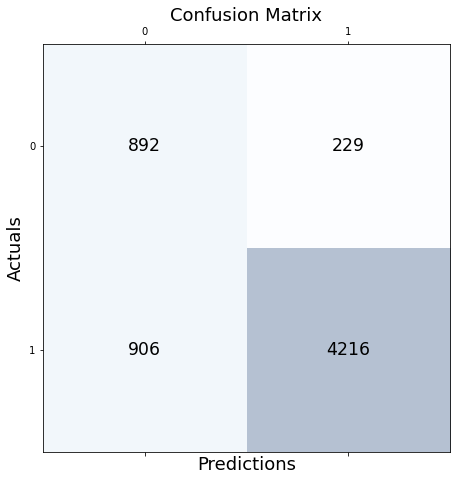

In [23]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [24]:
print("O erro da predição para o grupo de risco foi de ",
    round((conf_matrix[0,1] / conf_matrix[0,0]),2)
)

O erro da predição para o grupo de risco foi de  0.26


In [34]:
dfp_2019 = pd.DataFrame(pred_2019, columns = ['Previsão'])
dfp_2019.shape
# Realiza um left join dos dados de 2019 com a previsão
# Realiza um left join dos dados de 2019 com a previsão
previsao_de_2019 = dados19f.join(dfp_2019)

In [36]:
# Visualizando o novo dataset
previsao_de_2019.head(2)


,Unnamed: 0,escola,serie,turno,idade,munic,proc_escola,proc_rendimento,biologia,ed_fisica,...,geografia,historia,lingua_estrangeira,lingua_portuguesa,matematica,quimica,sociologia,qtd_faltas,parecer_conclusivo,Previsão
0,1,111,1,3,1,2,1,3,0.552467,-0.174232,...,-0.324932,-0.443779,0.577407,0.884624,0.470093,0.118779,0.209846,-1.092049,1,1
1,2,111,1,1,1,2,1,3,-0.786315,-1.742108,...,-0.324932,0.122747,0.057398,0.591261,-0.745402,0.981936,0.209846,1.415059,1,1


Criando coluna de teste para identificar se a previsão do registro foi correta ou não

In [41]:
# Criando colunas de teste
# • Coluna de Teste Previsão = Real 
previsao_de_2019["Teste"] = np.where( previsao_de_2019["Previsão"] == previsao_de_2019["parecer_conclusivo"] ,1,0)
# • Coluna de Teste Risco Previsão  = Real 
previsao_de_2019["Teste_0"] = np.where((previsao_de_2019['parecer_conclusivo'] == 0) & (previsao_de_2019['Previsão'] == 0) ,1,0)

In [38]:
resultado = round( previsao_de_2019["Teste_0"].sum()
/
np.where( previsao_de_2019["parecer_conclusivo"] ==0,0,1).sum()
,3)

In [39]:
print("O Erro da classificação para o grupo de risco nesta regional é de: ",
resultado * 100,"%.")

O Erro da classificação para o grupo de risco nesta regional é de:  17.4 %.


Salvando o novo dataset em XLSX para serem disponibilizadas aos professores pela ferramenta adequada.

In [167]:
previsao_de_2019.to_excel('dados_2019_am.xlsx', index = True)

Verificando a proporção de acertos do modelo com os dados de 2019.

In [43]:
print("A proporção de acertos é: ",
round( previsao_de_2019["Teste"].sum()/previsao_de_2019.shape[0],3)*100,'%.'
)



A proporção de acertos é:  81.8 %.


## <font color='black'> <p align = "center">Conclusão</p></font>   
Concluímos que a acurácia do modelo foi satisfatória para a classificação dos alunos com risco de reprovação , apresentando um erro de apenas 17,4%.